## Credit Card Fraud Detection Project



## Overview

Banking fraud, poses a significant threat to the key goal of many banks to retain high profitable customers. 

In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

 
In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.


In this project we will predict fraudulent credit card transactions with the help of machine learning models.

We will use the dataset thae has been provided to us and includes credit card transactions made by European cardholders over a period of two days in September 2013


## Approach

We will follow these sequence of steps to complete this project

1. Load and understand the data
2. Exploratory Data Analysis
3. Data Preparation
        - Remove Unnecessary Columns
        - Train Test split
        - Scaling
        - Check Skewness in data
        - Mitigate skweness 
4. Model Building on Imbalanced Data
        -Logistic Regression
        -Decision Tree
        -Random Forest
        -XGBOOST
        -Select Best Model
                -Apply best hyperparameters
                -Predict on Test data
                -Important Features of best model
5. Model Building with balancing classes

    5.1 RandomOverSamplimg
            -Handle Data Imbalance - RandomOverSampling
            -Model Building on Data Blanced with RandomOverSampling
                -Logistic Regression
                -Decision Tree
                -Random Forest
    5.2 SMOTE
            -Handle Data Imbalance - SMOTE
            -Model Building on Data Blanced with SMOTE
                -Logistic Regression
                -Decision Tree
                -Random Forest
    5.3 ADASYN
            -Handle Data Imbalance - ADASYN
            -Model Building on Data Blanced with ADASYN
                -Logistic Regression
                -Decision Tree
                -Random Forest
6. Select best method
        -Apply best hyperparameters
        -Predict on Test data
        -Important Features of best model
        -FPR,TPR & best threshold from the roc curve


In [11]:
# Import Required Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

## 1. Load and Understand Data

In [12]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Observations
We can see that there are tota 31 variables present in dataset including the target variable

28 variables are named from V1 till V31 whic are PCA transofrmed variables

Apart from that we have Time, Amount and Target variable Class

## 2. Exploratory Data Analysis

In [3]:
# Check shape 0f dataset
df.shape

(284807, 31)

In [4]:
# Describe and check statistics of data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#Check Info, observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Observations

There are no missing values in dataset

We have all numerical data

We have to perform scaling on Amount variable


In [6]:
#Here we will observe the distribution of our classes
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [7]:
print(classes,  '\n' + "Normal Share",  normal_share, '\n'+ "Fraud Share",  fraud_share)

0    284315
1       492
Name: Class, dtype: int64 
Normal Share 99.82725143693798 
Fraud Share 0.1727485630620034


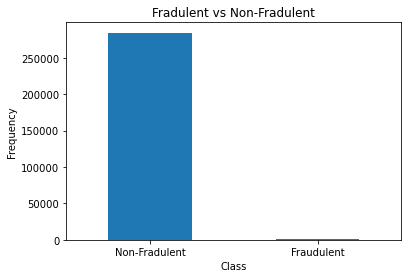

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

#Bar plot for number of fraudulent vs non-fraudulent transcations
LABELS = ['Non-Fradulent','Fraudulent']
classes.plot(kind='bar', rot=0)
plt.title("Fradulent vs Non-Fradulent")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

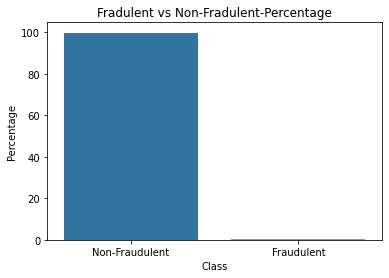

In [9]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
f_percent = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_f_percent = pd.DataFrame(f_percent) 
sns.barplot(x='Class',y='Percentage', data=df_f_percent)
plt.title('Fradulent vs Non-Fradulent-Percentage')
plt.show()

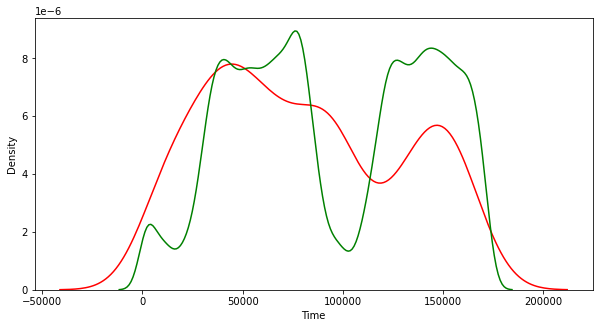

In [5]:
# Dstribution of classes with time

# Fraudulent and non-fraudulent dataframe
fraudulent = df[df['Class'] == 1]
non_fraudulent = df[df['Class'] == 0]

# Distribution plot
plt.figure(figsize=(10,5))
ax = sns.distplot(fraudulent['Time'],label='Fraudulent',hist=False,color='red')
ax = sns.distplot(non_fraudulent['Time'],label='Non-Fraudulent',hist=False,color='green')
plt.show()

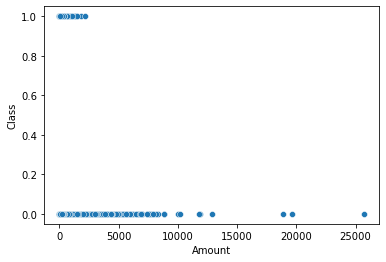

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(y=df.Class, x=df.Amount, data=df)
plt.show()

### Observation

We can see that data is highly imbalanced

We have only 492 (0.172%) class 1/ Fradulent records in the complete dataset having a total of 284807 records

No specific pattern observed for fraud / non-fraud transaction with Time variable, so we would drop Time column  from dataset

Transaction amount for fradulent transactions lies in low range of values 

While for fraudiulent tranactions there is much scattered distribution 

In [13]:
# Drop unnecessary columns
#No specific pattern observed for fraud / non-fraud transaction with Time variable
#Dropping Time column from dataset
df.drop(['Time'], axis=1, inplace=True)


In [13]:
#Check the dataframe now
print(df.shape)
print(df.Class.value_counts())

(284807, 30)
0    284315
1       492
Name: Class, dtype: int64


In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3. Data Preparation



### Splitting the data into train & test data

In [14]:
y= df['Class']#class variable
X=df.drop("Class", axis = 1)

In [15]:
from sklearn import model_selection

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.21, random_state = 4, stratify = y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
# Check the number of class 1 records in train and test splits
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
389
103


### Scaling

All variables are PCA transformed except Amount. So we will perform scaling on Amount variable

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# Instantiate the Scaler
scaler = StandardScaler()
# scaler fit and transform train data
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [19]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
90739,-2.085950,-0.562724,1.004463,-0.039061,-0.143738,-0.730252,0.337159,0.630254,-0.241269,-0.839743,...,0.528650,0.084180,-0.437237,0.294396,0.321640,0.072334,0.204690,0.110712,-0.062164,0.375117
143067,-7.391824,5.902386,-2.953364,-2.275789,-3.162678,-1.252551,-2.165812,3.356244,2.540859,4.056253,...,1.666890,-0.472487,-0.576021,0.426879,-0.084700,0.641277,0.660802,-0.108192,-0.716392,-0.339693
115738,1.370512,-1.241506,0.671616,-1.408839,-1.772115,-0.591391,-1.174243,0.005290,-1.883079,1.585218,...,-0.270524,-0.298846,-0.688738,0.136260,0.264102,0.057806,-0.429882,0.025292,0.025951,-0.116730
234482,2.108108,-0.207740,-3.386067,-0.720760,2.905339,2.932171,0.054796,0.562129,0.017654,0.190507,...,-0.174293,0.095248,0.367526,0.010535,0.784185,0.412944,0.734475,-0.093999,-0.091945,-0.348281
134661,1.042359,0.081131,-0.065916,0.834935,0.850517,1.659977,-0.134906,0.525102,-0.140862,-0.082221,...,-0.284039,0.114326,0.620169,-0.073075,-1.314074,0.546884,-0.145374,0.078446,-0.014896,-0.347326


In [20]:
#Scaler transform on test data
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
117591,0.348886,0.831842,0.938372,0.325586,-0.218539,-0.802119,0.095819,-1.004671,-0.324146,-0.555295,...,-0.146953,0.456072,-1.167113,-0.025173,0.356454,0.857684,0.170925,0.032431,0.113428,-0.343430
4113,1.434118,-0.629689,-0.896080,-1.630113,1.475000,3.268643,-1.192888,0.714758,0.362106,0.289916,...,0.187513,-0.288388,-0.889306,0.096195,0.919151,0.363258,-0.506572,-0.016725,0.012487,-0.251907
117517,1.196000,0.244842,0.631835,0.643022,-0.413231,-0.699692,0.019665,-0.112526,-0.047069,-0.122758,...,-0.109274,-0.203807,-0.533694,0.201841,0.406878,0.116101,0.102664,-0.009140,0.019718,-0.347366
220552,2.162127,0.042093,-2.058212,0.167980,0.857007,-0.542554,0.475203,-0.359167,0.320442,0.086561,...,-0.151922,-0.085761,-0.022670,0.017091,0.110029,0.321629,0.569315,-0.097428,-0.076763,-0.351302
278291,-3.945636,1.374168,-1.126366,-2.413680,-2.074371,0.147603,-1.623214,2.414933,1.115540,-1.960320,...,-0.575601,0.164443,-0.012906,-0.560656,-1.217942,0.726570,0.661534,-0.694099,-0.282516,0.038327


### Plotting the distribution of variables to check Skewness in Data

In [22]:
var_l = X_train.columns

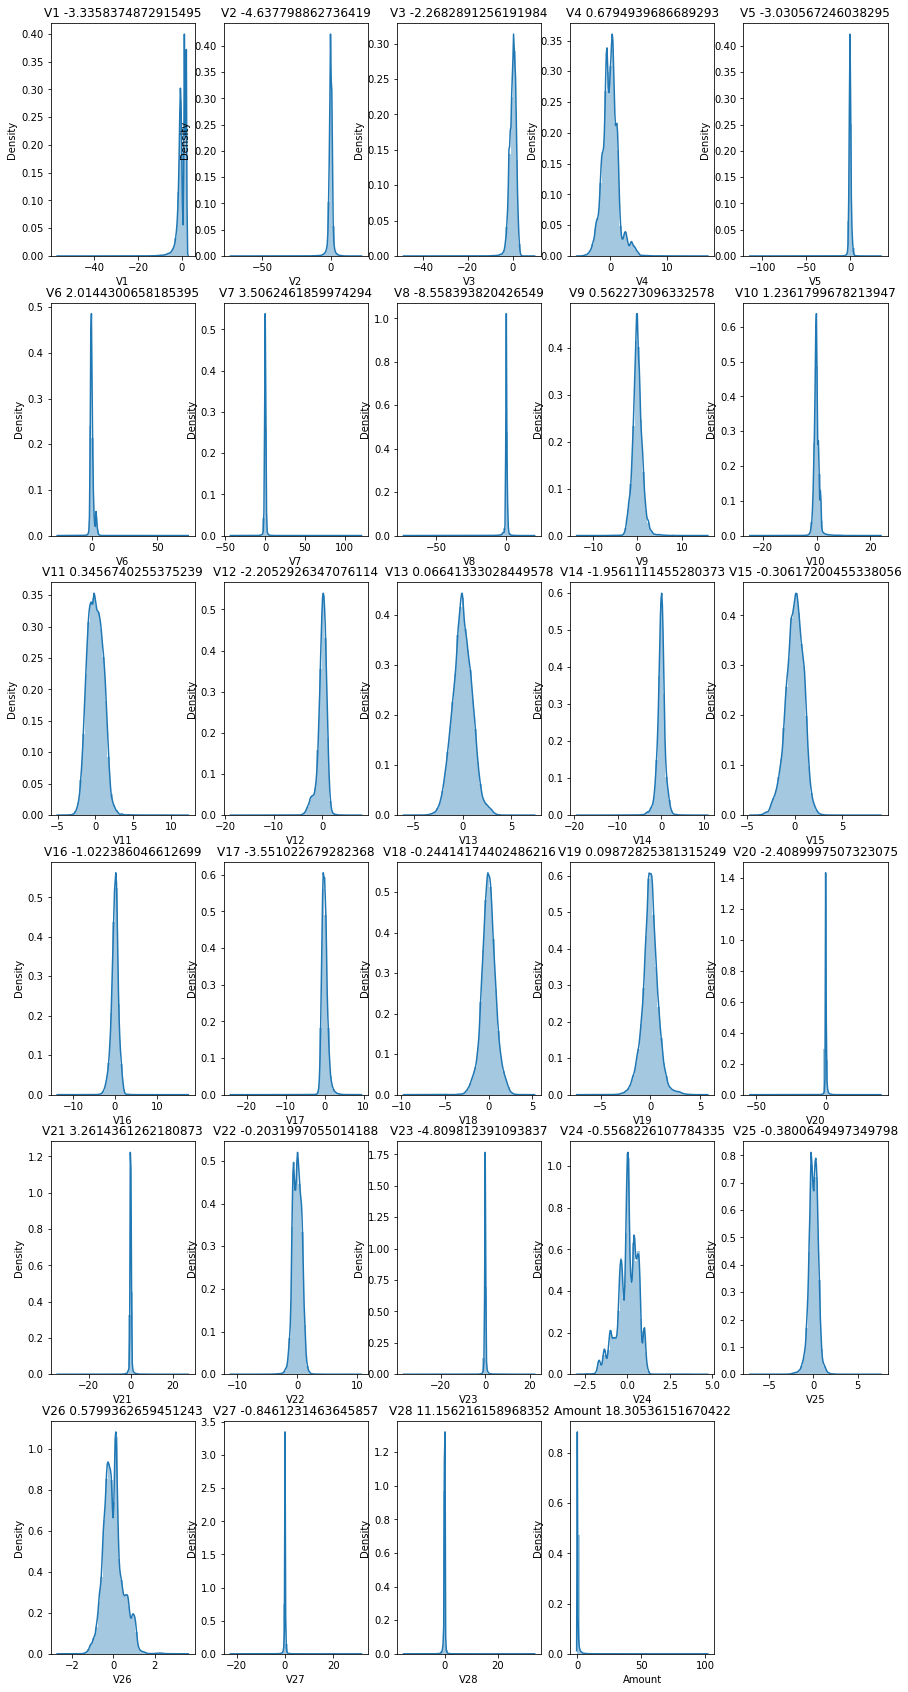

In [22]:
var_l = X_train.columns
# plot the distribution of variables to see the skewness
x=0
plt.figure(figsize=(15,30))
for var in var_l :    
    x+=1
    plt.subplot(6, 5,x)    
    sns.distplot(X_train[var])
    plt.title(var+' '+str(X_train[var].skew()))

##### Observation

We can see that few features are skewed. We will mitigate skewness to make them normally distributed in next step

### Mitigate the skewness in data
- Using <b> Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [23]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform on train data
X_train[var_l] = PT.fit_transform(X_train)

# Transform on test set

X_test[var_l] = PT.transform(X_test)

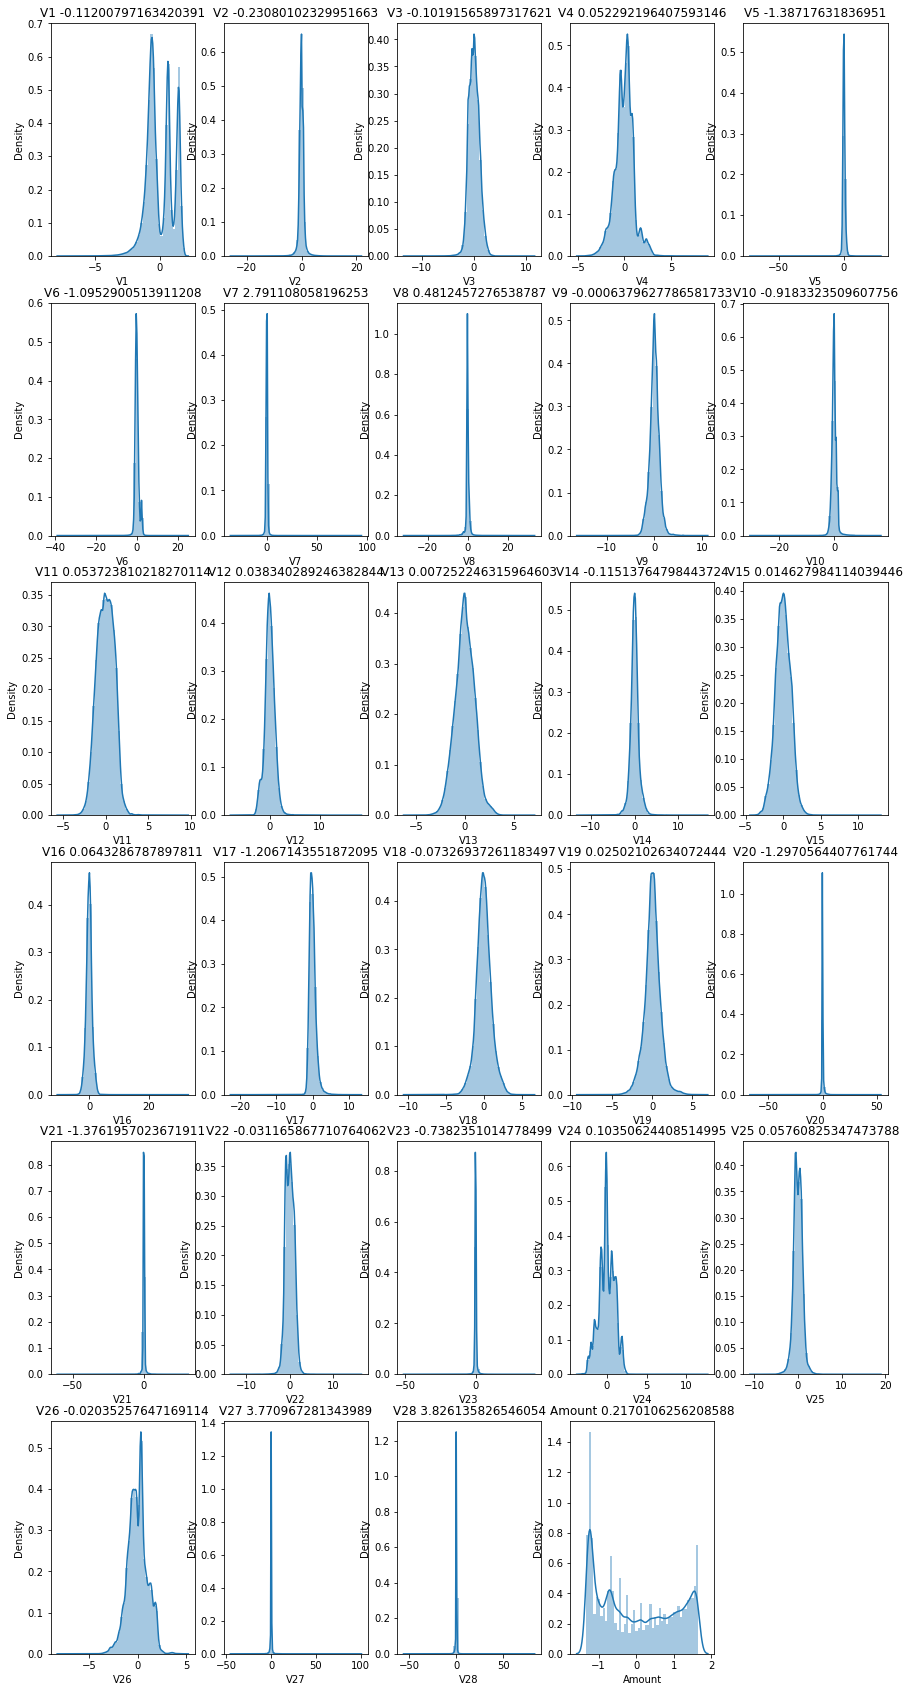

In [24]:
# plot the distribution of variables again to see the result 

x=0
plt.figure(figsize=(15,30))
for var in var_l :    
    x+=1
    plt.subplot(6, 5,x)    
    sns.distplot(X_train[var])
    plt.title(var+' '+str(X_train[var].skew()))


##### Observation
All features are normally distributed now and we can proceed with model building

## 4.  Model Building on imbalanced Data
- Build different models on the imbalanced dataset and see the result
- Performance Evaluation Metrics
    - Going with AUC-ROC as evaluation metric because here score is computed considering all possible thresholds and this metric is independent of threshold.

    - Other metrices e.g. accuracy, confusion matrix, recision, recall F1 score are threshold dependent, if we change the threshold metric will change and we can not use it to measure performnce.

    - Accuracy anyway is not the right metric for the kind of dataset we have which is highly imbalanced
- Looking at number of class 1 records we have in train set keeping the number of folds 4 to have atleast aroung 100 class 1 records in each fold


### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc,RocCurveDisplay
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [26]:
#perform cross validation

#Looking at class 1 records we have in train set keeping the number of folds 4 to have aroung atleast 100 class 1 records in each fold
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4) 

#perform hyperparameter tuning
c_space = [0.01,0.03,0.05,0.1,0.3,0.5,1,3,5]
params = {'C': c_space}
lm = LogisticRegression(max_iter=500)# Tried with default value first but did not converge, manually set max_iter to given value to work
lm_cv = GridSearchCV(estimator=lm, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit the model
lm_cv.fit(X_train, y_train)



Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 3, 5]},
             scoring='roc_auc', verbose=1)

In [27]:
#Best AUC
print("Best AUC: ", lm_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", lm_cv.best_params_)

Best AUC:  0.9793520169001473
Best hyperparameters:  {'C': 0.01}


In [28]:
#We got best heperparameter 'C' as 0.01. Trying one more iteration with heperparameter values closer to last best 0.01 
c_space = [0.001, 0.003, 0.005, 0.008, 0.01,0.013,0.015, 0.02]
params = {'C': c_space}
lm = LogisticRegression(max_iter=500)# Tried with default value first but did not converge, manually set max_iter to given value to work
lm_cv = GridSearchCV(estimator=lm, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit the model
lm_cv.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.001, 0.003, 0.005, 0.008, 0.01, 0.013, 0.015,
                               0.02]},
             scoring='roc_auc', verbose=1)

In [29]:
#Best AUC
print("Best AUC: ", lm_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", lm_cv.best_params_)

Best AUC:  0.9793520169001473
Best hyperparameters:  {'C': 0.01}


In [30]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred_prob = lm_cv.predict_proba(X_train)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", lm_cv.best_params_)

Train AUC:    	 0.9823
Best hyperparameters:  {'C': 0.01}


In [31]:
# evaluation on test data
y_test_pred_prob = lm_cv.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9847


In [32]:
# Storing the result
result = {"Model":["Logistic Regression"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = pd.DataFrame(result)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847


### Similarly explore other algorithms by building models like:

- Decision Tree
- Random Forest
- XGBoost

### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
#perform cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8]}

dt = DecisionTreeClassifier(random_state=1)
dt_cv = GridSearchCV(estimator=dt, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit the model
dt_cv.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [26]:
#Best AUC
print("Best AUC: ", dt_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv.best_params_)

Best AUC:  0.9419409868294428
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20}


In [27]:
#Trying one more iteration with heperparameter values closer to last best 
params = {"criterion": ['gini'], 'min_samples_leaf': [15, 20, 25, 30, 40], 'max_depth': [6,7,8,10]}

dt = DecisionTreeClassifier(random_state=1)
dt_cv = GridSearchCV(estimator=dt, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
dt_cv.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [6, 7, 8, 10],
                         'min_samples_leaf': [15, 20, 25, 30, 40]},
             scoring='roc_auc', verbose=1)

In [28]:
#Best AUC
print("Best AUC: ", dt_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv.best_params_)

Best AUC:  0.943746360257633
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20}


We saw a little bit of improvement after trying more granular hyperparameters in this iteration

In [29]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred_prob = dt_cv.predict_proba(X_train)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", dt_cv.best_params_)

Train AUC:    	 0.9547
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20}


In [30]:
# evaluation on test data
y_test_pred_prob = dt_cv.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9401


In [34]:
# Storing the result
result = {"Model":["Decision Tree"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9401


### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
#perform cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 1)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8], 'n_estimators': [50,80]}

rf = RandomForestClassifier(n_jobs = -1)
rf_cv = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_cv.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [50, 80]},
             scoring='roc_auc', verbose=1)

In [43]:
#Best AUC
print("Best AUC: ", rf_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", rf_cv.best_params_)

Best AUC:  0.9739963219216801
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100, 'n_estimators': 50}


In [44]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred_prob = rf_cv.predict_proba(X_train)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", rf_cv.best_params_)

Train AUC:    	 0.9902
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100, 'n_estimators': 50}


In [45]:
# evaluation on test data
y_test_pred_prob = rf_cv.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9783


In [35]:
# Storing the result
result = {"Model":["Random Forest"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9401
2,Random Forest,0.9902,0.9783


### XGBOOST

In [47]:
pip install xgboost

     |████████████████████████████████| 173.5 MB 8.9 kB/s  eta 0:00:01�█████████                 | 81.1 MB 57.9 MB/s eta 0:00:02 |████████████████▎               | 88.1 MB 57.9 MB/s eta 0:00:02  | 94.9 MB 57.9 MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [66]:
import xgboost as xgb
from sklearn import metrics
from sklearn import model_selection

In [50]:
#perform cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

#perform hyperparameter tuning
parameters = {'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5], 'subsample': [0.3, 0.5, 0.7],'max_depth':[5,8], 'n_estimators': [50]}
scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True, needs_proba=True, needs_threshold=False) 

xgbm = xgb.XGBClassifier()
xgbm_cv = model_selection.GridSearchCV(estimator=xgbm, param_grid=parameters, n_jobs=-1, cv=folds, scoring=scorer, refit=True)

xgbm_cv.fit(X_train, y_train)

[19:24:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_ch...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                        

In [51]:
#Best AUC
print("Best AUC: ", xgbm_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", xgbm_cv.best_params_)

Best AUC:  0.9795089038328144
Best hyperparameters:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.7}


In [52]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred_prob = xgbm_cv.predict_proba(X_train)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", xgbm_cv.best_params_)

Train AUC:    	 1.0
Best hyperparameters:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.7}


In [53]:
# evaluation on test data
y_test_pred_prob = xgbm_cv.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9736


In [36]:
# Storing the result
result = {"Model":["XGBOOST"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9401
2,Random Forest,0.9902,0.9783
3,XGBOOST,1.0000,0.9736


### Select Best Model on imbalanced Data
      

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

- We saw that after trying different models on imbalanced data XG boost performed best.
- XGBOOST is very resource intensive and took a lot of time for training.
- Random Forest also performed well. This also consume lot of resources and took good time for training
- Logistic regression took less time and resources and gave good performance result

- Initializing XGBOOST with best hyperparameters and showing the results again

In [68]:

#initialise the model with optimum hyperparameters

clf = xgb.XGBClassifier(learning_rate=0.3, subsample=0.7, max_depth=5, n_estimators=50)
clf.fit(X_train, y_train)

clf.fit(X_train, y_train)


[13:02:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
# evaluation on train data
y_train_pred_prob = clf.predict_proba(X_train)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))


Train AUC:    	 1.0


In [70]:
#print the evaluation score on the X_test by choosing the best evaluation metric
y_test_pred_prob = clf.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),2))


Test AUC:    	 0.97


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


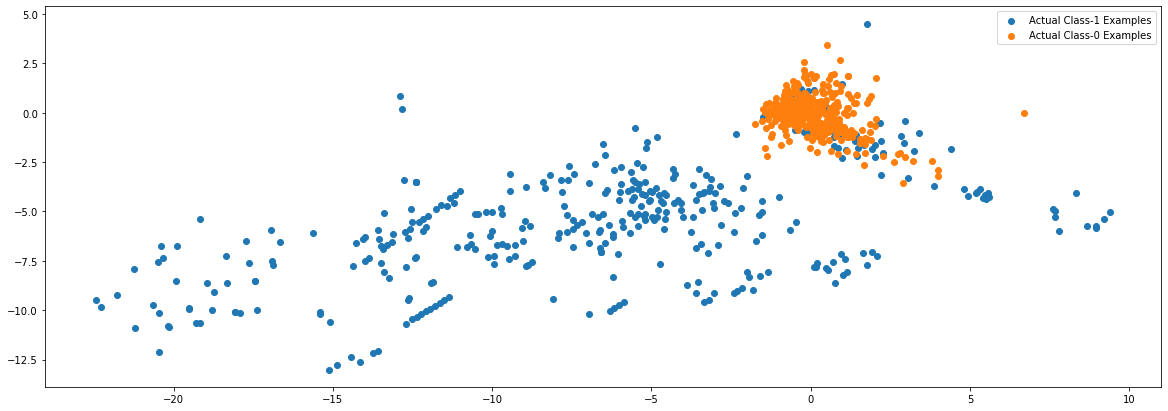

In [71]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Taking top 2 variables and creating a scatter plot against classes
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 7]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Feature: 0, Score: 0.02073
Feature: 1, Score: 0.02362
Feature: 2, Score: 0.02383
Feature: 3, Score: 0.03597
Feature: 4, Score: 0.01544
Feature: 5, Score: 0.02580
Feature: 6, Score: 0.02943
Feature: 7, Score: 0.02764
Feature: 8, Score: 0.01700
Feature: 9, Score: 0.04480
Feature: 10, Score: 0.01927
Feature: 11, Score: 0.02731
Feature: 12, Score: 0.02148
Feature: 13, Score: 0.06153
Feature: 14, Score: 0.01495
Feature: 15, Score: 0.01884
Feature: 16, Score: 0.32570
Feature: 17, Score: 0.01790
Feature: 18, Score: 0.01547
Feature: 19, Score: 0.02173
Feature: 20, Score: 0.01548
Feature: 21, Score: 0.01597
Feature: 22, Score: 0.01863
Feature: 23, Score: 0.02014
Feature: 24, Score: 0.01779
Feature: 25, Score: 0.02225
Feature: 26, Score: 0.02500
Feature: 27, Score: 0.03395
Feature: 28, Score: 0.02237


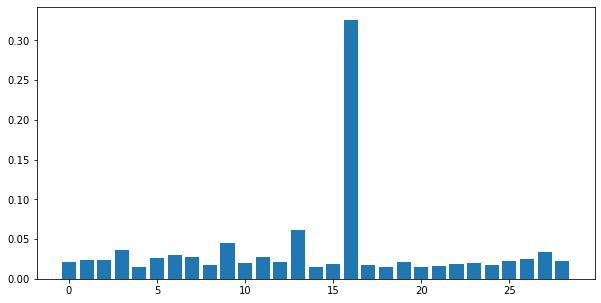

In [72]:
# Listing all the features with their importance and creating a bar plot

importance = clf.feature_importances_


# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Obdservation

Vriable 17 (Index 16) and Variable 14 (Index 13) are top two features

## 5. Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

##### Tried Different Models on balanaced data
- XGBOOST has not been ran on balanced data for building the model. XGBOOST was taking lot of resources and time as seen while building model on imbalanced data above. 
- With limited resources in hand tried models with:
    - Logistic Regression
    - Decision Tree
    - Random Forest

### 5.1 Random Oversampling

In [14]:
import imblearn
from imblearn.over_sampling import RandomOverSampler #- import the packages

#Initialize RandomOverSampler
ROS = RandomOverSampler(random_state=1)

#Run RandomOverSampler on Train data to handle imbalance
X_train_ROS, y_train_ROS = ROS.fit_resample(X_train, y_train)

from collections import Counter

print(sorted(Counter(y_train).items())) #count before Random oversampling
print(sorted(Counter(y_train_ROS).items())) #count after Random oversampling



[(0, 224608), (1, 389)]
[(0, 224608), (1, 224608)]


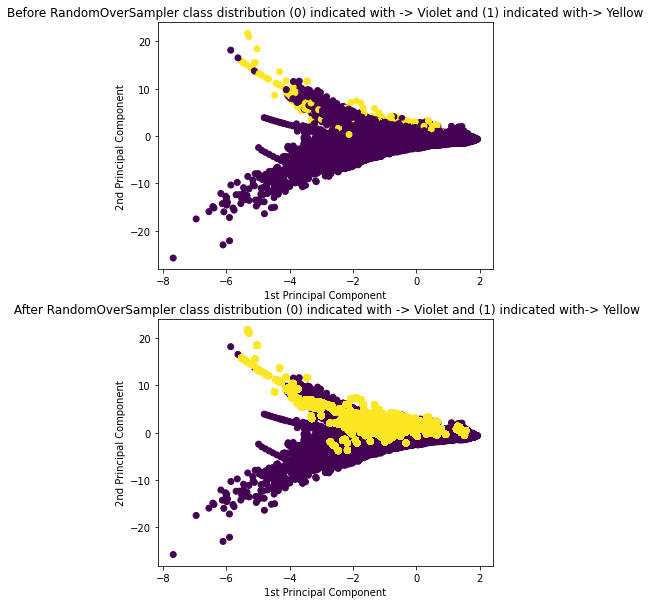

In [15]:
# scatter plot of examples by class labels before and after Random Oversampling

plt.figure(figsize = (6, 10))
plt.subplot(2, 1, 1)
plt.scatter(X_train['V1'], X_train['V2'], c = y_train)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Before RandomOverSampler class distribution (0) indicated with -> Violet and (1) indicated with-> Yellow')
plt.subplot(2, 1, 2)
plt.scatter(X_train_ROS['V1'], X_train_ROS['V2'], c = y_train_ROS)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('\n\n After RandomOverSampler class distribution (0) indicated with -> Violet and (1) indicated with-> Yellow')
plt.show()




###  Model Building 
- Build different models on the balanced dataset and see the result
- Using 5 folds with balanced data

### Logistic Regression

In [18]:
#perform cross validation 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
c_space = [0.01,0.03,0.05,0.1,0.3,0.5,1,3,5]
params = {'C': c_space}
lm_ROS = LogisticRegression(max_iter=500)# Tried with default value first but did not converge, manually set max_iter to given value to work
lm_cv_ROS = GridSearchCV(estimator=lm_ROS, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

lm_cv_ROS.fit(X_train_ROS, y_train_ROS)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 3, 5]},
             scoring='roc_auc', verbose=1)

In [19]:
#Best AUC
print("Best AUC: ", lm_cv_ROS.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", lm_cv_ROS.best_params_)

Best AUC:  0.9863167197173496
Best hyperparameters:  {'C': 1}


In [21]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred_prob = lm_cv_ROS.predict_proba(X_train_ROS)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_ROS, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", lm_cv_ROS.best_params_)

Train AUC:    	 0.9863
Best hyperparameters:  {'C': 1}


In [29]:
# evaluation on test data
y_test_pred_prob = lm_cv_ROS.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9803


In [37]:
# Storing the result
result = {"Model":["Logistic Regression With RandomOverSampler"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ROS, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9401
2,Random Forest,0.9902,0.9783
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9863,0.9803


### Build models on other algorithms to see the better performing on RandomOverSampler

### Decision Tree

In [33]:
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8]}

dt_ROS = DecisionTreeClassifier(random_state=1)
dt_cv_ROS = GridSearchCV(estimator=dt_ROS, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
dt_cv_ROS.fit(X_train_ROS, y_train_ROS)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [34]:
#Best AUC
print("Best AUC: ", dt_cv_ROS.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv_ROS.best_params_)

Best AUC:  0.9984831869294142
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10}


In [35]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred_prob = dt_cv_ROS.predict_proba(X_train_ROS)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_ROS, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", dt_cv_ROS.best_params_)

Train AUC:    	 0.9982
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10}


In [36]:
# evaluation on test data
y_test_pred_prob = dt_cv_ROS.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9055


In [38]:
# Storing the result
result = {"Model":[" with RandomOverSampler"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ROS, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9401
2,Random Forest,0.9902,0.9783
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9863,0.9803
5,Decision Tree With RandomOverSampler,0.9982,0.9055


### Random Forest

In [41]:
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [10, 20, 50, 100], 'max_depth': [3, 5, 8], 'n_estimators': [50, 80] }

rf_ROS = RandomForestClassifier(n_jobs = -1)
rf_cv_ROS = GridSearchCV(estimator=rf_ROS, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_cv_ROS.fit(X_train_ROS, y_train_ROS)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'n_estimators': [50, 80]},
             scoring='roc_auc', verbose=1)

In [42]:
#Best AUC
print("Best AUC: ", rf_cv_ROS.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", rf_cv_ROS.best_params_)

Best AUC:  0.9997609418246908
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10, 'n_estimators': 50}


In [43]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred_prob = rf_cv_ROS.predict_proba(X_train_ROS)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_ROS, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", rf_cv_ROS.best_params_)

Train AUC:    	 0.9998
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10, 'n_estimators': 50}


In [44]:
# evaluation on test data
y_test_pred_prob = rf_cv_ROS.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9747


In [39]:
# Storing the result
result = {"Model":["Random Forest with RandomOverSampler"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ROS, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9401
2,Random Forest,0.9902,0.9783
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9863,0.9803
5,Decision Tree With RandomOverSampler,0.9982,0.9055
6,Random Forest With RandomOverSampler,0.9998,0.9747


### 5.2 SMOTE
### Print the class distribution after applying SMOTE 

In [75]:
from imblearn import over_sampling

Before SMOTE Counter({0: 224608, 1: 389})
After SMOTE Counter({0: 224608, 1: 224608})


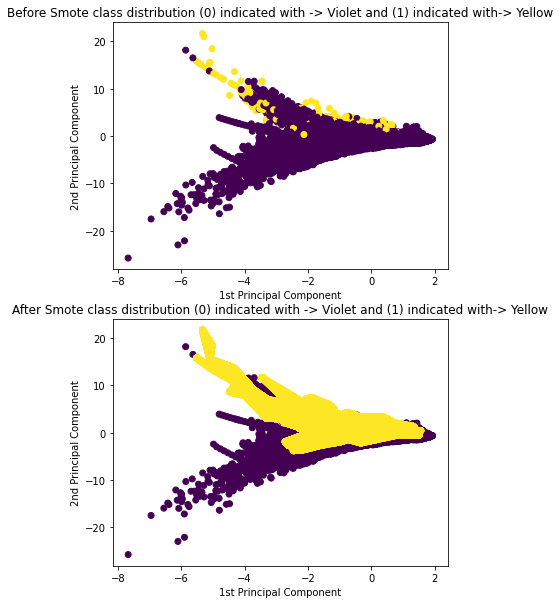

In [78]:
import warnings
warnings.filterwarnings("ignore")
from numpy import where


# Initialize SMOTE
sm = over_sampling.SMOTE(random_state=0)

#Run SMOTE on train data to handle imbalance
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# summarize the new class distribution 

counter = Counter(y_train)
print("Before SMOTE", counter)

counter = Counter(y_train_smote)
print("After SMOTE", counter)

# scatter plot of examples by class label before and ater applying SMOTE

plt.figure(figsize = (6, 10))
plt.subplot(2, 1, 1)
plt.scatter(X_train['V1'], X_train['V2'], c = y_train)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Before Smote class distribution (0) indicated with -> Violet and (1) indicated with-> Yellow')
plt.subplot(2, 1, 2)
plt.scatter(X_train_smote['V1'], X_train_smote['V2'], c = y_train_smote)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('After Smote class distribution (0) indicated with -> Violet and (1) indicated with-> Yellow')
plt.show()




###  Model Building
### Logistic Regression

In [48]:
#perform cross validation 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
c_space = [0.01,0.03,0.05,0.1,0.3,0.5,1,3,5]
params = {'C': c_space}
lm_smote = LogisticRegression(max_iter=500)# Tried with default value first but did not converge, manually set max_iter to given value to work
lm_cv_smote = GridSearchCV(estimator=lm_smote, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

lm_cv_smote.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 3, 5]},
             scoring='roc_auc', verbose=1)

In [49]:
#Best AUC
print("Best AUC: ", lm_cv_smote.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", lm_cv_smote.best_params_)

Best AUC:  0.9891308363846475
Best hyperparameters:  {'C': 5}


In [50]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred_prob = lm_cv_smote.predict_proba(X_train_smote)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", lm_cv_smote.best_params_)

Train AUC:    	 0.9891
Best hyperparameters:  {'C': 5}


In [51]:
# evaluation on test data
y_test_pred_prob = lm_cv_smote.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9798


In [40]:
# Storing the result
result = {"Model":["Logistic Regression With SMOTE"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_smote, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df


,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9401
2,Random Forest,0.9902,0.9783
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9863,0.9803
5,Decision Tree With RandomOverSampler,0.9982,0.9055
6,Random Forest With RandomOverSampler,0.9998,0.9747
7,Logistic Regression With SMOTE,0.9891,0.9798


### Build models on other algorithms to see the better performing on SMOTE

### Decision Tree

In [53]:
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8]}

dt_smote = DecisionTreeClassifier(random_state=1)
dt_cv_smote = GridSearchCV(estimator=dt_smote, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
dt_cv_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [54]:
#Best AUC
print("Best AUC: ", dt_cv_smote.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv_smote.best_params_)

Best AUC:  0.9956129373648274
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20}


In [55]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred_prob = dt_cv_smote.predict_proba(X_train_smote)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", dt_cv_smote.best_params_)

Train AUC:    	 0.9965
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20}


In [56]:
# evaluation on test data
y_test_pred_prob = dt_cv_smote.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9246


In [41]:
# Storing the result
result = {"Model":["Decision Tree with SMOTE"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_smote, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9401
2,Random Forest,0.9902,0.9783
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9863,0.9803
5,Decision Tree With RandomOverSampler,0.9982,0.9055
6,Random Forest With RandomOverSampler,0.9998,0.9747
7,Logistic Regression With SMOTE,0.9891,0.9798
8,Decision Tree With SMOTE,0.9965,0.9246


### Random Forest

In [58]:
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8], 'n_estimators': [50,80]}

rf_smote = RandomForestClassifier(n_jobs = -1)
rf_cv_smote = GridSearchCV(estimator=rf_smote, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_cv_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [50, 80]},
             scoring='roc_auc', verbose=1)

In [59]:
#Best AUC
print("Best AUC: ", rf_cv_smote.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", rf_cv_smote.best_params_)

Best AUC:  0.9983643448346508
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 80}


In [60]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred_prob = rf_cv_smote.predict_proba(X_train_smote)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", rf_cv_smote.best_params_)

Train AUC:    	 0.9983
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 80}


In [61]:
# evaluation on test data
y_test_pred_prob = rf_cv_smote.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9832


In [42]:
# Storing the result
result = {"Model":["Random Forest with SMOTE"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_smote, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df


,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9401
2,Random Forest,0.9902,0.9783
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9863,0.9803
5,Decision Tree With RandomOverSampler,0.9982,0.9055
6,Random Forest With RandomOverSampler,0.9998,0.9747
7,Logistic Regression With SMOTE,0.9891,0.9798
8,Decision Tree With SMOTE,0.9965,0.9246
9,Random Forest With SMOTE,0.9983,0.9832


## 5.3 ADASYN
### Print the class distribution after applying ADASYN

Before ADASYN Counter({0: 224608, 1: 389})
After ADASYN Counter({1: 224609, 0: 224608})


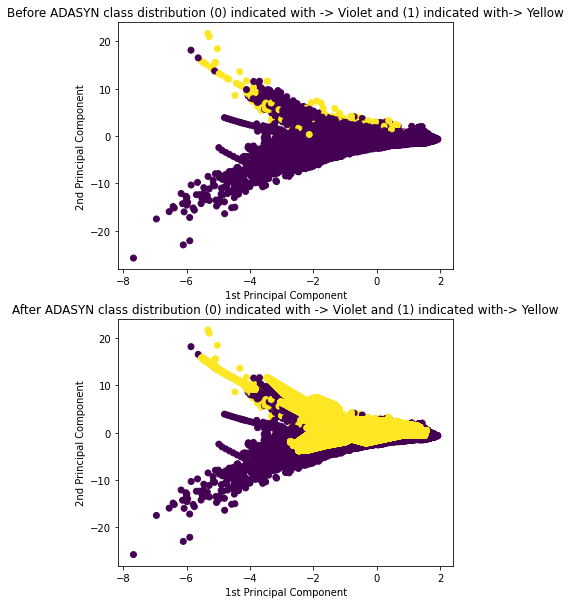

In [63]:
# initialize ADASYN
ada = over_sampling.ADASYN(random_state=0)

#Run ADSYN on train data to handle data imbalance
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# summarize the new class distribution

counter = Counter(y_train)
print("Before ADASYN", counter)

counter = Counter(y_train_adasyn)
print("After ADASYN", counter)

# scatter plot of examples by class label before and after applying ADASYN

plt.figure(figsize = (6, 10))
plt.subplot(2, 1, 1)
plt.scatter(X_train['V1'], X_train['V2'], c = y_train)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Before ADASYN class distribution (0) indicated with -> Violet and (1) indicated with-> Yellow')
plt.subplot(2, 1, 2)
plt.scatter(X_train_adasyn['V1'], X_train_adasyn['V2'], c = y_train_adasyn)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('After ADASYN class distribution (0) indicated with -> Violet and (1) indicated with-> Yellow')
plt.show()


### Model Building
### Logistic Regression

In [64]:
#perform cross validation 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
#perform hyperparameter tuning
c_space = [0.01,0.03,0.05,0.1,0.3,0.5,1,3,5]
params = {'C': c_space}
lm_ada = LogisticRegression(max_iter=500)# Tried with default value first but did not converge, manually set max_iter to given value to work
lm_cv_ada = GridSearchCV(estimator=lm_ada, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

lm_cv_ada.fit(X_train_adasyn, y_train_adasyn)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 3, 5]},
             scoring='roc_auc', verbose=1)

In [65]:
#Best AUC
print("Best AUC: ", lm_cv_ada.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", lm_cv_ada.best_params_)

Best AUC:  0.9600610695234881
Best hyperparameters:  {'C': 5}


In [66]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred_prob = lm_cv_ada.predict_proba(X_train_adasyn)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", lm_cv_ada.best_params_)

Train AUC:    	 0.9601
Best hyperparameters:  {'C': 5}


In [67]:
# evaluation on test data
y_test_pred_prob = lm_cv_ada.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9799


In [43]:
# Storing the result
result = {"Model":["Logistic Regression With ADASYN"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_adasyn, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df


,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9401
2,Random Forest,0.9902,0.9783
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9863,0.9803
5,Decision Tree With RandomOverSampler,0.9982,0.9055
6,Random Forest With RandomOverSampler,0.9998,0.9747
7,Logistic Regression With SMOTE,0.9891,0.9798
8,Decision Tree With SMOTE,0.9965,0.9246
9,Random Forest With SMOTE,0.9983,0.9832


### Build models on other algorithms to see the better performing on ADASYN

### Decision Tree

In [69]:
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3,5,8]}

dt_ada = DecisionTreeClassifier(random_state=1)
dt_cv_ada = GridSearchCV(estimator=dt_ada, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
dt_cv_ada.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [70]:
#Best AUC
print("Best AUC: ", dt_cv_ada.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv_ada.best_params_)

Best AUC:  0.9860091018531405
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100}


In [71]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred_prob = dt_cv_ada.predict_proba(X_train_adasyn)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", dt_cv_ada.best_params_)

Train AUC:    	 0.9849
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100}


In [72]:
# evaluation on test data
y_test_pred_prob = dt_cv_ada.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9425


In [44]:
# Storing the result
result = {"Model":["Decision Tree with ADASYN"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_adasyn, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9401
2,Random Forest,0.9902,0.9783
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9863,0.9803
5,Decision Tree With RandomOverSampler,0.9982,0.9055
6,Random Forest With RandomOverSampler,0.9998,0.9747
7,Logistic Regression With SMOTE,0.9891,0.9798
8,Decision Tree With SMOTE,0.9965,0.9246
9,Random Forest With SMOTE,0.9983,0.9832


### Random Forest

In [74]:
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3,5,8], 'n_estimators' : [50,80]}

rf_ada = RandomForestClassifier(n_jobs = -1)
rf_cv_ada = GridSearchCV(estimator=rf_ada, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_cv_ada.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [50, 80]},
             scoring='roc_auc', verbose=1)

In [75]:
#Best AUC
print("Best AUC: ", rf_cv_ada.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", rf_cv_ada.best_params_)

Best AUC:  0.9976683465935391
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10, 'n_estimators': 80}


In [76]:
#print the evaluation result by choosing a evaluation metric

# evaluation on train data
y_train_pred_prob = rf_cv_ada.predict_proba(X_train_adasyn)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", rf_cv_ada.best_params_)

Train AUC:    	 0.9978
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10, 'n_estimators': 80}


In [77]:
# evaluation on test data
y_test_pred_prob = rf_cv_ada.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.978


In [45]:
# Storing the result
result = {"Model":["Random Forest with ADASYN"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_adasyn, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df


,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9401
2,Random Forest,0.9902,0.9783
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9863,0.9803
5,Decision Tree With RandomOverSampler,0.9982,0.9055
6,Random Forest With RandomOverSampler,0.9998,0.9747
7,Logistic Regression With SMOTE,0.9891,0.9798
8,Decision Tree With SMOTE,0.9965,0.9246
9,Random Forest With SMOTE,0.9983,0.9832


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

- We saw that after trying different models on balanced data Random Forest with SMOTE performed best. Gave good results on train as well as generalized well on test data.
- Random Forest consumes resources and took lot of time to train

- Logistic regression consumed less resources and took less time to train and gave good performance result 

- Purely looking at performance choosing RandomForest with SMOTE which gave very dood results.
- Initializing Random Forest with best hyperparameters and showing the results again

In [79]:
# perform the best oversampling method on X_train & y_train

clf = RandomForestClassifier(n_jobs = -1, criterion='gini', max_depth=8, min_samples_leaf=5, n_estimators=80)  #initialise the model with optimum hyperparameters
clf.fit(X_train_smote, y_train_smote) # fit on the balanced dataset

RandomForestClassifier(max_depth=8, min_samples_leaf=5, n_estimators=80,
                       n_jobs=-1)

In [85]:
# evaluation on train data
y_train_pred_prob = clf.predict_proba(X_train_smote)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),4))


Train AUC:    	 0.9983


In [109]:
#print the evaluation score on the X_test by choosing the best evaluation metric
y_test_pred_prob = clf.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),2))


Test AUC:    	 0.98


### Print the important features of the best model to understand the dataset

Top var = 10
2nd Top var = 14
3rd Top var = 12


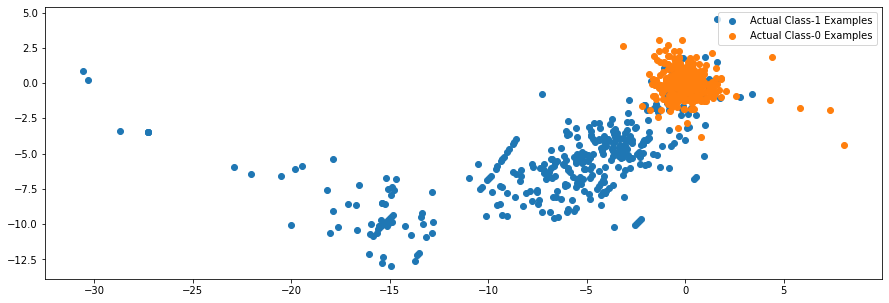

In [90]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Taking top 2 variables and creating a scatter plot against classes
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Feature: 0, Score: 0.00482
Feature: 1, Score: 0.01266
Feature: 2, Score: 0.01931
Feature: 3, Score: 0.11460
Feature: 4, Score: 0.01353
Feature: 5, Score: 0.00748
Feature: 6, Score: 0.02905
Feature: 7, Score: 0.01019
Feature: 8, Score: 0.01437
Feature: 9, Score: 0.17852
Feature: 10, Score: 0.06850
Feature: 11, Score: 0.14430
Feature: 12, Score: 0.00408
Feature: 13, Score: 0.16542
Feature: 14, Score: 0.00274
Feature: 15, Score: 0.03215
Feature: 16, Score: 0.11596
Feature: 17, Score: 0.01659
Feature: 18, Score: 0.00955
Feature: 19, Score: 0.00342
Feature: 20, Score: 0.00830
Feature: 21, Score: 0.00217
Feature: 22, Score: 0.00405
Feature: 23, Score: 0.00111
Feature: 24, Score: 0.00188
Feature: 25, Score: 0.00315
Feature: 26, Score: 0.00231
Feature: 27, Score: 0.00278
Feature: 28, Score: 0.00702


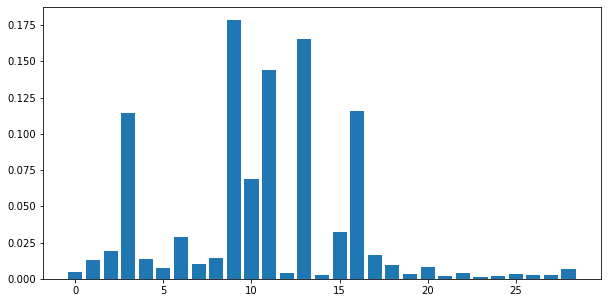

In [91]:
# Listing all the features with their importance and creating a bar plot

importance = clf.feature_importances_


# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Obdservation

Vriable 10 (Index 9) and Variable 14 (Index 13) are top two features

### Print the FPR,TPR & select the best threshold from the roc curve

In [92]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_prob))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_prob)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9982524248648998
0.3671462600729486


#### Let us print ROC Curve, and classification report on this final model

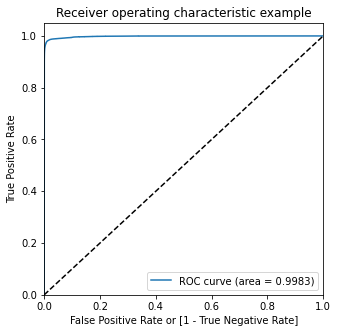

In [98]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_prob, drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_train_smote, y_train_pred_prob,)

plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [121]:
# Impoting metrics module
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report



y_train_pred = pd.Series(y_train_pred_prob).map(lambda x: 1 if x > 0.367146 else 0)
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print("Confusion Metrics \n", confusion, '\n')


# classification_report
print("Classification Report\n", classification_report(y_train_smote, y_train_pred))




Confusion Metrics 
 [[222396   2212]
 [  4642 219966]] 

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    224608
           1       0.99      0.98      0.98    224608

    accuracy                           0.98    449216
   macro avg       0.98      0.98      0.98    449216
weighted avg       0.98      0.98      0.98    449216



# Summary

### Load and understand the data


- We can see that there are tota 31 variables present in dataset including the target variable

- 28 variables are named from V1 till V31 whic are PCA transofrmed variables

- Apart from that we have Time, Amount and Target variable Class


#### Exploratory Data Analysis

- There are no missing values in dataset

- We have all numerical data

- We have to perform scaling on Amount variable
- We can see that data is highly imbalanced

- We have only 492 (0.172%) class 1/ Fradulent records in the complete dataset having a total of 284807 records

- No specific pattern observed for fraud / non-fraud transaction with Time variable, so we would drop Time column  from dataset

- Transaction amount for fradulent transactions lies in low range of values 

- While for fraudiulent tranactions there is much scattered distribution 



#### Data Preparation
- All variables are PCA transformed except Amount. So we will perform scaling on Amount variable
- We can see that few features are skewed. We will mitigate skewness to make them normally distributed 
- All features are normally distributed and skewness is handled with Power Transformer, we can proceed with model building
   
#### Model Building on Imbalanced Data
- Performance Evaluation Metrics
    - Going with AUC-ROC as evaluation metric because here score is computed considering all possible thresholds and this metric is independent of threshold.

    - Other metrices e.g. accuracy, confusion matrix, recision, recall F1 score are threshold dependent, if we change the threshold metric will change and we can not use it to measure performnce.

    - Accuracy anyway is not the right metric for the kind of dataset we have which is highly imbalanced
- Looking at number of class 1 records we have in train set keeping the number of folds 4 to have atleast aroung 100 class 1 records in each fold for cross validation
- We saw that after trying different models on imbalanced data XG boost performed best.

- XGBOOST is very resource intensive and took a lot of time for training.

- Random Forest also performed well. This also consume lot of resources and took good time for training

- Logistic regression took less time and resources and gave good performance result

- <B> Chosen XGBOOST as te best model here with Train ROC-AUC Score - 1.0000, Test ROC-AUC Score - 0.9736
-Vriable 17 (Index 16) and Variable 14 (Index 13) are top two features in this best model

    
#### Model Building with balancing classes

- XGBOOST has not been ran on balanced data for building the model. XGBOOST was taking lot of resources and time as seen while building model on imbalanced data above. 
- With limited resources in hand tried models with Logistic Regression, Decision Tree, Random Forest
- Using 5 folds with balanced data for cross validation
- We saw that after trying different models on balanced data Random Forest with SMOTE performed best. Gave good results on train as well as generalized well on test data.
- Random Forest consumes resources and took lot of time to train

- Logistic regression consumed less resources and took less time to train and gave good performance result 

- Purely looking at performance chosing RandomForest with SMOTE which gave very good results.
- <B> Chosen Random Forest with SMOTE as best model here with Train ROC-AUC Score - 0.9983, Test ROC-AUC Score - 0.9832
- <B> We saw the improvement in performance of Logistic Regression, Decision Tree and Random Forest models on balanced data compared to imbalanced data

### Result  of Experiments

In [126]:
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9401
2,Random Forest,0.9902,0.9783
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9863,0.9803
5,Decision Tree With RandomOverSampler,0.9982,0.9055
6,Random Forest With RandomOverSampler,0.9998,0.9747
7,Logistic Regression With SMOTE,0.9891,0.9798
8,Decision Tree With SMOTE,0.9965,0.9246
9,Random Forest With SMOTE,0.9983,0.9832
